# WHETGEO-1D ex_00 
## Infiltration of water into a single-layered soil profile


    - Authors: Niccolò Tubini and Riccardo Rigon
    - Licence: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
_____ 

First of all welcome in the GEOframe ecosystem.

In this first tutorial you will learn how to set up WHETGEO-1D for solving the Richardson-Richards equation (R2).


## Contents
    
* [Tutorial example and objectives](#Description)
    
* [Pre-processing](#pre-processing)
    - [soil hydraulic parameters](#soil_parameters)
    - [initial condition](#initial_condition)
    - [Define the computational grid](#computational_grid)
    - [Create the computational grid](#create_the_computational_grid)
    
* [Set up the .sim file](#setup)
    
* [Run the simulation](#run)
    
* [Post-processing](#post_processing)

## Tutorial example and objectives <a class="anchor" id="Description"></a>

This first example involves the infiltration of water from a ponded soil surface into a $2$ [m] depth single-layered soil.

<figure>
    <img src="Figures/ex00.png" width="800" height="800/1.618">
    <figcaption>Fig.1 - WHETGEO-1D ex00. </figcaption>
<figure>
    

Initially the soil is unsaturated, and we assume that the pressure head profile is hydrostatic with water pressure equal to $-1$ [m] at the bottom. At the soil surface we have a pond of $0.02$ [m] depth, representing a constant pressure head boundary condition, while at the bottom water drains by gravity, aka free-drainage boundary condition.

This example aims to show:
- the advance of the wetting front both in terms of water pressure and water content
- the fluxes through the soil surface and the bottom.


## Pre-processing  <a class="anchor" id="pre-processing"></a>

To numerically solve the R2 equation it is necessary to discretize the domain, assign the soil parameters, assign the initial condition for the water pressure, and prescribe the type and the values for the boundary conditions.

All these information are contained in the folder `/data` of your OMS project. Specifically
- `data/Grid_input` contains the .csv file used to define the computational grid. To define a compuational grid we need of three files:
    - one defining the computational grid;
    - one defining the initial condition;
    - one containing the soil parameters.
    These files are elaborated by a Jupyter notebook in order to set up the computational grid. 
- `data/Grid_NetCDF` collects the netCDF files (.nc) containing all the data of the computational grid, i.e. geometrical quantities, soil parameters, and the initial condition. 
- `/data/Timeseries` contains the time series for the boundary conditions and a time series used to select the time step we want to use. All these time series are .csv files OMS compliant. To know how to prepare such files please have a look at the notebook `00_OMS_Timeseries.ipynb`.

### Soil parameters <a class="anchor" id="soil_parameters"></a>

The soil hydraulic properties are define by the Van Genucthen model.

For instance, the parameters for the Van Genuchten model are defined in the file `data/Grid_input/Richards_VG.csv`. These values are those presented in Bonan et al. 2019.
The first line defines the column header, and # is used to add some comments in the file.

Each soil is identified by a number, 1 stands for sand, 2 for Loamny-sand, and so on. These numbers are used later to define the stratigraphy of the soil. 

Of course you can create your own file by copying the header and fill it with your values. 

### Initial condition <a class="anchor" id="initial_condition"></a>

The initial condition is defined starting from values prescribed in some specific points (depths) of the soil profile. These values can be the result of some field survey or, when not available, you may choose them.

For each control volume we must assign an initial condition, and this is obtained by interpolating the values.

### Define the computational grid <a class="anchor" id="computational_grid"></a>

The file is `/data/Grid_input/ex_00_grid.csv`. This files contains five columns

| Type    | eta   | K      | equationStateID   | parameterID |
|---------|-------|--------|-------------------|-------------|

where:
- **Type** this column contains L or M. L is used to specify the surface and bottom of the soil profile as well as the interface between two different soil layers. M is used to specify a measurament point used to identify the position of experimental data points for inverse modelling pourposes.
- **eta** is the vertical coordinate positive upward with 0 set at the soil surface
- **K** is the number of the control volumes used to discretize each soil layer
- **equationStateID** it is an integer defining which equation state we want to use. This number corresponds to an index of vector that we will define in the .sim file. For now it is 0.
- **parameterID** it is an integer defining the set of soil parameters for each layer. This numeber corresponds to an index of the vector containing all the values of a specific parameter.


Let's start with defining the stratigraphy of the soil profile. In our example we have a single-layered profile of $2$ [m]. Let us assume we want to discretize the domain with 200 control volumes, thus with a spatial resolution of $0.02$ [m]. We can edit the file `/data/Grid_input/ex_00_grid.csv` as

| Type    | eta   | K      | 
|  :---:  | :---: | :---:  | 
|L        | 0     | 100    | 
|L        | -2    | nan    | 

Then we can complete `/data/Grid_input/ex_00_grid.csv` adding values for the remaining columns. Here we simulate only the R2 equation therefore **equationStateID** is 0, and as soil type we chose Silt loam thus **parameterID** is 4.

| Type    | eta   | K      | equationStateID   | parameterID |
|  :---:  | :---: | :---:  | :---:             | :---:       |
|L        | 0     | 100    | 0                 | 4           |
|L        | -2    | nan    | nan               | nan         |

### Create the computational grid<a class="anchor" id="create_the_computational_grid"></a>

To create the computational grid we can use the notebook `Jupyter_Notebook/WHETGEO1D_Richards_Computational_grid.ipynb`.
In the following we report the input required to create the grid.


#### Define input:
**grid_input_file_name**: name of the grid input file (.csv) with the local file path 
   
> `/data/Grid_input/name.csv`

**ic_input_file_name**: name of the initial condition input file (.csv) with the local file path 
> `/data/Grid_input/name.csv`

**parameter_input_file_name**: name of the parameter input file (.csv) with the local file path 
>`/data/Grid_input/name.csv`

**dictionary_input_file_name**: name of the file (.csv) containing the dictionary for parameters name 
>`/data/Grid_input/name.csv`

**grid_type**: string defining how to discretize the 1D domain. You can choose among:
> `classical`


**dz_min**: thickness of the first layer (for `exponential` and `mixed`)

**dz_max**: larger thickness of the grid (for `mixed`)

**b**: growth rate (for `exponential` and `mixed`)

**psi_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for water suction 
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 

**T_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for temperature
>https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 


**output_file_name**: name of the output file (.nc) with the local file path
>`/data/Grid_NetCDF/name.nc`

**output_title**: string containing a title for the output, it is saved within the file

**output_summary**: string containing a description for the output, it is saved within the file (global metadata)

**output_date**: string containing the date of file creation, optionally

**output_institution**: string containing the name of whom created the file, optionally



In [1]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')


project_path = os.path.dirname(os.getcwd())


grid_input_file_name = project_path + "/data/Grid_input/ex00_grid.csv"

ic_input_file_name = project_path + "/data/Grid_input/ex00_ic.csv"

parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'

dz_min = -9999 # not required for grid_type = 'classical'

dz_max = -9999 # not required for grid_type = 'classical'

b = -9999      # not required for grid_type = 'classical'

psi_interp_model = "linear"

T_interp_model = "linear"



output_file_name =  project_path + "/data/Grid_NetCDF/ex00_grid.nc"

output_title = '''Computational grid for ex00.
                  '''
output_summary = '''

'''

output_date = ''

output_institution = 'GEOframe'



In [2]:
data_grid = pd.read_csv(grid_input_file_name)
# print('Grid')
# print(data_grid)
# print()

data_ic = pd.read_csv(ic_input_file_name)
# print('IC')
# print(data_ic)
# print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
# print('Parameter')
# print(data_parameter)
# print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\emmat\Desktop\OMS_WHETGEO1D/data/Grid_NetCDF/ex00_grid.nc


## Setup the ex00_.sim file <a class="anchor" id="setup"></a>

To setup the `ex_00.sim` you can:

- open it with a text editor

- use the text editor of Jupyter Notebook

- edit and save the file directly within this notebook. In this case you load the file with the magic `%load filename`, edit the file, save the file by calling `%%writefile filename` at the beginning of the cell containing the your file.

vantaggio: tutti i dati di input sono contenute nelle prime righe dle simfile.
Una volta predisposto il sim file si può fare la simulazione:

file ecdf: per ogni istante temporale coordinata depth e coordiata time per ogni variabile.

**Here a brief explanation on how to specify the input of the simulation.**

Firts of all we have to specify the file containing the computational grid

```groovy
    def richardsGridFileName = "$oms_prj//data/Grid_NetCDF/ex00_grid.nc"
```

This file contains all the data, geometrical quantities, soil parameters, and initial condition of the problem.


As said above the soil hydraulic properties are described by the van Genuchten model, so we specify
```groovy
def typeClosureEquation = "{Van Genuchten}"
def typeEquationState = "{Van Genuchten}"
def typeUHCModel = "{Mualem Van Genuchten}"
```
As regards the unsaturated hydraulic conductivity model, up to now we do not want to take into account the effect of soil temperature on the water viscosity thus we specify
```groovy
def typeUHCTemperatureModel = "notemperature"
```
Then it is necessary to prescribe how to evaluate the unsaturated hydraulic conductivity at the interface between two adjacent control volumes
```groovy
def interfaceHydraulicConductivityModel = "max"
```

Now we move to the definition of the boundary conditions: one at the soil surface (_top_) and at the bottom of the soil column (_bottom_). The boundary condition control the time evolution of the system and their must be consistent with the problem one wants to solve. In this example we have water ponding at the soil surface so we know the value of the pressure, i.e. Dirichlet boundary condition type
```groovy
def topBCType = "Top Dirichelet"
```
Regarding the bottom boundary condition, we assume that water flows downward accordingly to the gravity force, the gradient of $\psi$ is 0. 
```groovy
def bottomBCType = "Bottom free drainage"
```

Then we need to specify the start date and end date [yyyy-mm-dd hh:mm] of the simulation 
```groovy
def startDate= "2020-01-01 00:00"
def endDate="2020-01-02 00:00"
```
and the time step [minutes] of the time series of the boundary conditions 
```groovy
def tTimestep = 1
```

The components that read the time series require as input the header of the column containg the values. This header can be found at line 5 of each `.csv` and this value must be equal for all the files containing the time series of the simulation
```groovy
def stationID = "0"
```

The files containing the time series for the _top_ and _bottom_ boundary condition are respectively
```groovy
def topBCFileName = "$oms_prj//data/Timeseries/ex00_water_ponding.csv"
def bottomBCFileName = "$oms_prj//data/Timeseries/ex00_free_drainage.csv"
```
To be noted that the in case of free drainage boundary condition we do not have to provide any value, but we must provide for the component responsible for reading the time series. 

Moreover, we provide another time series that specify for which date we want to save the output on the disk: 1 to save outputs, 0 otherwise
```groovy
def saveDatesFileName = "$oms_prj//data/Timeseries/ex00_save_dates.csv"
```

At last we can specify path of the output file. Usually output are save in the `output` folder of the project. If you prefer you can save it in a different folder the important thing is that the folder you specify exists
```groovy
def outputFileName = "$oms_prj//output/ex00.nc"
```

## Post-processing  <a class="anchor" id="post_processing"></a>

Once you have run the simulation, you can find the output in the folder `output`. The file is a netCDF and it can be easily read with the [xarray](http://xarray.pydata.org/en/stable/). 

In [27]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": True,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

**Read the output file**

In [28]:
ds = xr.open_dataset(project_path + '/output/ex00_0000.nc')

**Here you can inspect the netCDF file**

In [29]:
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.99 -1.97 -1.95 ... -0.05 -0.03 -0.01
  * dualDepth         (dualDepth) float64 -2.0 -1.98 -1.96 ... -0.06 -0.04 -0.02
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\Niccolo\OMS\OMS_Project_WHET...
    path_bottom_boundary_condition:     C:\Users\Niccolo\OMS\OMS_Project_WHET...
    path_grid:                          C:\Users\Niccolo\OMS\OMS_Project_WHET...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
ds.error.plot(ax=ax)
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 720x444.994 with 1 Axes>

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

a = ds.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 720x444.994 with 2 Axes>

Grafico con y: profondità; x: temporale; valuta suzione;
        
lama d'acqua: fa si che l'acqua si muova verso il passo: più il colore tende al bianco più il suolo è asciutto. man mano che blu più intenso, suzione prosssima a 0.

man mano che t avanza, il fronte di inibizione si abbassa: acqua entra nel dominio.

Parte in fondo: abbiamo inizialmente un blu molto intenso e via via diminuisce di intensità == acqua sta uscendo: per le c al contorno, l'acqua in superficie, posta la condizione per cui acqua esce per gravità: $\delta(\psi)/\delta(z)$

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.theta.values), vmax=np.amax(ds.theta.values))

a = ds.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 720x444.994 with 2 Axes>

Contenuto d'acqua (tempo): tramite le curve di ritenzione idrica da Suzione a Contenuto d'acqua.
la parte più alta mostra che il suolo aumenta di saturazione e che al fondo il contenuto d'acqua decresce.



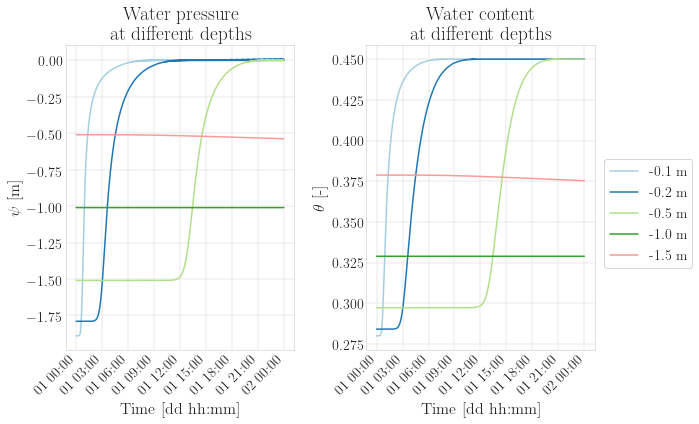

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2, method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-1.0, method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-1.5, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[3])
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

Selezionando delle profondità e vedere come variano la suzione e contenuto d'acqua nel tempo: per profondità piccole, la suzione (valore iniziale) aumenta fino ad arrivare verso lo 0.
- a profondità più bassa si mantiene constante al val iniziale poi arriva il fronte di imbibizione e quindi aumenta

- a profondità di 1m: per il tempo della simulazione 1g rimane ininfluente rispetto alle c. iniziale (si dovrebbe aumentare t)
- a 1.5 m: man mano che passa il tempo la suzione diminuisce leggermente: il flusso d'acqua che esce dal fondo è molto minore rispetto a quello che succede in superficie

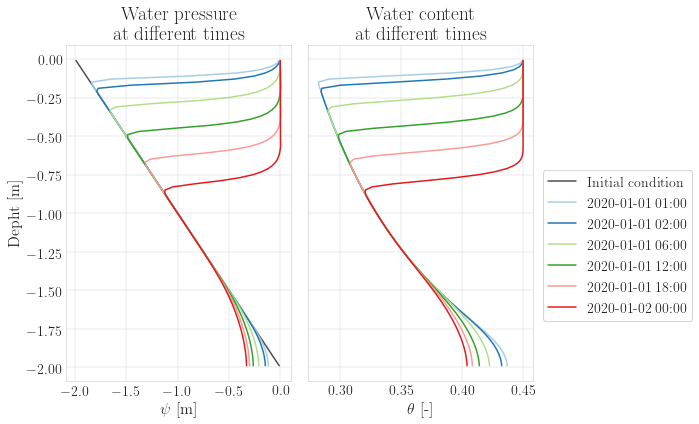

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-01-01 01:00').plot(ax=ax1, y='depth', label='2020-01-01 01:00', color=colors[0])
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax1, y='depth', label='2020-01-01 02:00', color=colors[1])
ds.psi.sel(time='2020-01-01 06:00').plot(ax=ax1, y='depth', label='2020-01-01 06:00', color=colors[2])
ds.psi.sel(time='2020-01-01 12:00').plot(ax=ax1, y='depth', label='2020-01-01 12:00', color=colors[3])
ds.psi.sel(time='2020-01-01 18:00').plot(ax=ax1, y='depth', label='2020-01-01 18:00', color=colors[4])
ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

# ds.psiIC.plot(y='depth', label='Initial condition', color='0.3')
plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2020-01-01 01:00').plot(ax=ax2, y='depth', label='2020-01-01 01:00', color=colors[0])
ds.theta.sel(time='2020-01-01 02:00').plot(ax=ax2, y='depth', label='2020-01-01 02:00', color=colors[1])
ds.theta.sel(time='2020-01-01 06:00').plot(ax=ax2, y='depth', label='2020-01-01 06:00', color=colors[2])
ds.theta.sel(time='2020-01-01 12:00').plot(ax=ax2, y='depth', label='2020-01-01 12:00', color=colors[3])
ds.theta.sel(time='2020-01-01 18:00').plot(ax=ax2, y='depth', label='2020-01-01 18:00', color=colors[4])
ds.theta.sel(time='2020-01-02 00:00').plot(ax=ax2, y='depth', label='2020-01-02 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

scegliere istanti temporali e graficare profilo suzione: 
- la linea nera c iniziale idrostatica --> eventuali variazioni sono da attribuire alle c. al contorno
- $\psi$=0
- suzione decresce come decresce z
- in superficie inizialmente condizioni sature, fronte tenfde a decrescere: la suzione tende a decrescere al fondo
- ulyimo time step: parte satura iniziale, poi profilo suzione cruva verso sinistra per effetto della c al contorno al fondo

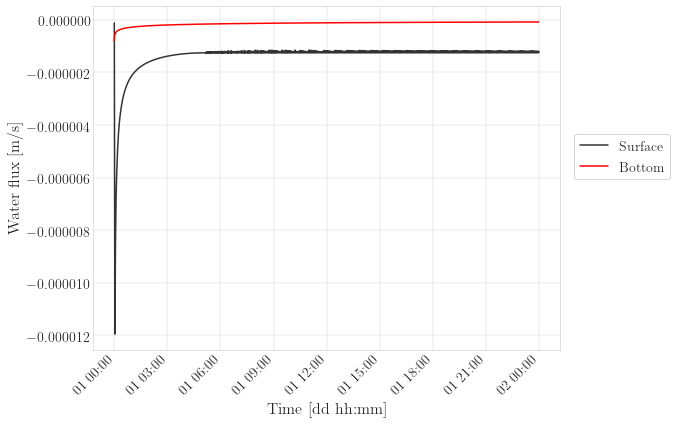

In [156]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

FLussi = quanta acqua esce / entra nel suolo:
- rossa: abbiamo un picco all'inizio; m/s: gradiente si riduce; c. al fondo: una parte più alta per chè il suolo ha una conducibilità idraulica maggiore e man mano che suolo si asciuga diminuisce la sua velocità; differenza tra valore max flussi al fondo e alla supercicie



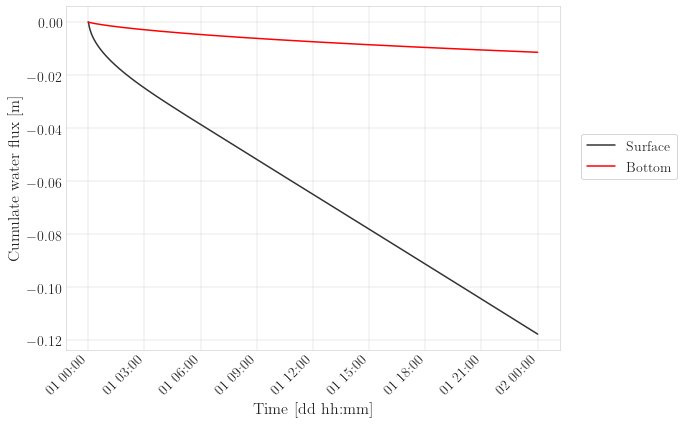

In [158]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

cumulata: volume che entra e che esce (rossa)

## OBIETTIVO: data condizione iniziale, data colonna di suolo: assegnamo c al contorno ---> risultati da analizzare in riferimento alle c al contorno perchè sono quelle hce decidono come evolve il sistema
prossimo step: come creare la griglia di calcolo.


## All'esame dobbiamo fare esempi in cui si sceglie la statigrafia, c al contorno, simulazione e risultati da commentare. 

# CREAZIONE GRIGLIA:
obiettivo di ottenere una griglia con interfacce rosse (superficiali e sottostrati); linea sup e in fondo sono quelle su cui si applicano le c. al fondo
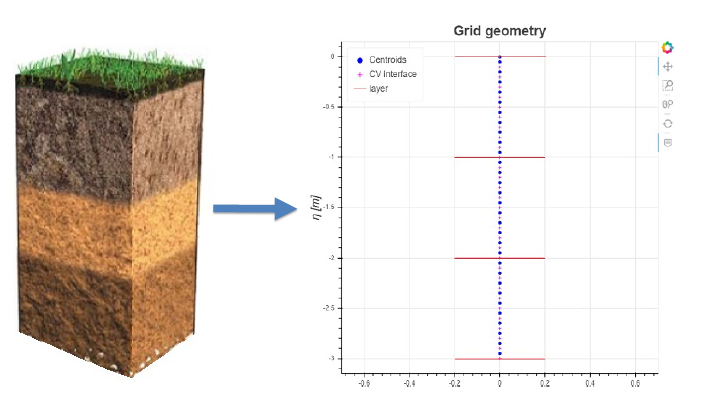

l'idea per la soluzione di R è di risolvere l'equaionzione in forma discreta, i punti su cui andiamo a risolvere le eq sono i pti blu

il risultato: volumi di controllo in cui il punto rappresentativo della soluzione separato dagli altri con le croci viola sono interfacce dei v di controllo.

**1. hp: stratigrafia**
come è fatta stratigrafia è l'ipotesi da fare:
- nel caso di diversi layer (profondità, tipo di suolo).
- tipo di suolo ci riferiamo ai parametri delle curve di ritenzione idrica
- c. iniziale da cui far evolvere la simulaizone al tempo zero: profilo di suzione a cui corrisponde profilo di contenuto d'acqua: tale fotografia suolo all'istante 0. c. iniziale è arbitraria: all'inizio idrostatica conviene per sapere che quello che succcede nel suolo si attribuire solamente alle c al contorno. se arbitrarie: l'acqua si muove oltre per effetto delle c al contorno (in sup e al fondo) anche per i gradienti di suzione.


Ci interessano i punti blu (centroide) su cui facciamo l'elaborazione.

i file di input da preparare per la griglia:
- file csv per geometria colonna di suolo (profondità e profondità strati) 
- file csv per c. iniziale (per punti)
- file csv in cui si inseriscono i param della curva di ritenzione idrica (V-G;BC,...) dizionario -> file in cui si possono inserire più set di parametri da cui pescare per avere proprietà della colonna

## grid_input_file_name.csv
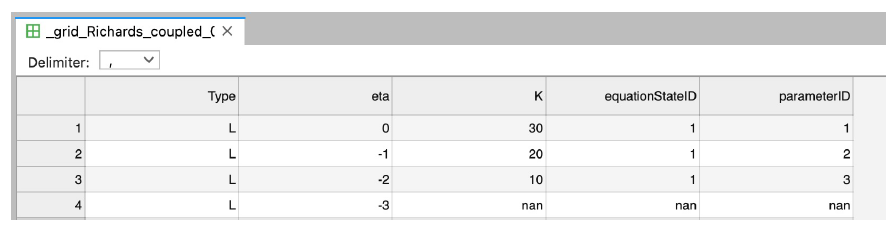

### **L=Layer**
* diverse colonne, la prima type si usa per specificare il Layer (L) - sono le righe rosse nella griglia; 
    - abbiamo 4 layer, nella prima riga $\eta$ = coordinata positiva verso alto e 0 == superficie del suolo; di conseguenza nella colonna sono negative
    - secondo layer a 1 m
    - terzo a 2m
    - colonna si chiude a 3m == si definisce con $\eta$ la profondità della colonna

### **M** 
per inserire delle righe dei punti di misura; per misure in campo e vogliamo calcolare la suzione in quel punto. volendo la colonna type è stata definita per poter inserire unnità di misura. Oltre ai nostri scopy

### **K**: numero di punti in cui vogliamo iscretizzare ciascun layer
quando si crea la griglia non si può avere la stessa densità di punti: di solito in generale si aumenta il numero di punti in superficie e si riduce il numero di punti andando in prodondità.

Per i vari layer a partire dall'alto ci sono: 30 punti; 20 pti; 10 pti: quando si crea la griglia non si vuole avere con la stessa densità di punti. più interessante aveer più punti in prossimità della superficie e diminuire la densità verso il fondo (minor costo computazionale).

### Colonna parameterID: per assegnare ad ogni layer il set di parametri 
assegnamo un numero == corrisponde a un set/riga nel file csv del parametro.
*Esempio file Richards_VG*: il # per inserire commenti nel file; il primo layer ha parameterID = 1: stiamo usando il set di parametri sotto il commento n.1.
il vantaggio è che possiamo aggiungere tutti i set di parametri diversi e poi nel file csv della griglia possiamo richiamare l'ID di parametri che ci interessa a noi.


## ic_input_file_name.csv
altro file csv: relativo alla **c iniziale**: viene assegnata per punti (coordinata $\eta$ che identifica il punto alla cui profondità si assegna un valore di $\psi_0$ e temperatura (interessa eventualmente per far dipendere conducibilità idraulica anche a T).
Si definiscono i punti a una certa profondità a cui si vogliono assegnare valori di suzione.

in questo caso la suzione: tipo idrostatico nel layer 1; al fondo suzione pari a 0 (come se ci fosse un'interfaccia tra zona satura e insatura della colonna di suolo). In superficie: suzione pari a 3.0 --> salendo di 3m la suzione decresce di altrettando.
Uno script python partendo questi due valori, interpola una retta e assegna a ciascun gruppo della griglia un valore di suzione-

## parameter_input_file_name.csv
**SWRC**: consentono di modellare le p idrauliche nel suolo:
- van g
- brooks.C
- kosugi
- romano: generalizzazione di Kosugi (unimodale) somma di due unimodali 

per ognuna di queste dobbiamo assegnare un file dei parametri

Abbiamo una tabella con i parametri:
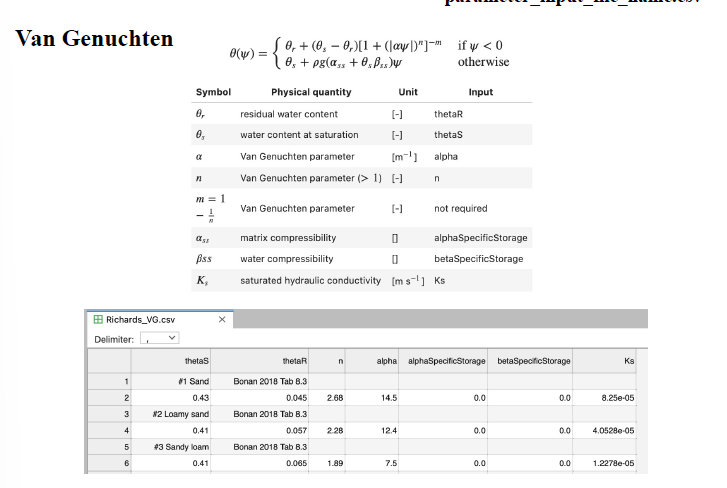

il parametro $\alpha [m^{-1}]$ in alcuni casi bisogna fare conversione da cm

nel caso di m: hp calcolato a partire dal valore di n quindi non deve essere definito dall'utente

$\alpha_{ss}$ e $\beta_{ss}$ specific storage: consentono di estendere nel dominio saturo la SWRC; nell'insaturo abbiamo la prima equazione del sistema mentre nel modello saturo contenuto d'acqua costante. Viene modificata aggiungendo un termine che tiene conto che quando si è a saturazione acqua e matrice solida soprattutto mezzi elasticin (acqua meno) così il contenuto d'acqua cambi leggermente man mano che aumenta la preessione dell'acqua

Ci sono file csv specifici per ogni parametrizzazione proprio perchè i parametri sono diversi per ognuna. quella di romano è generalizzazione: Kosugi è unimodale (descrizione pori) mentre R è ottenuta dalla somma di due curve unimodali.


preparati i file CSV: run tthe notebook $$WHETGEO1D_RichardsCoupled_Computational_grid.ipynb$$ consente di processare queste info per ottenere una griglia di calcolo.


Richards: sistema di tre equazioni; la prima consiste nel **bilancio di massa: SWRC + Darcy Buckingham**:

\begin{equation}
C(\phi)\cdot\frac{\delta(\phi)}{\delta(z)}=K*\frac{\delta(\phi + z)}{\delta(z)}
\end{equation}
misuro flusso con K maggiore tra i due volumi di controllo

la seconda equazione è la parametrizzazione di Maulem e la terza è la parametrizzazione di VG.